In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("cleaned_data_1.csv")

In [3]:
df=df.astype(float)

In [4]:
df.head()

,Touchscreen,Bluetooth,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,...,Multicolor,Orange,Pink,Purple,Red,Rose Gold,Silver,Starlight Sport,White,White Platinum
0,1.0,1.0,-9500.000000,0.035421,0.419833,0.571429,0.071557,0.341176,0.764706,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,-4500.000000,0.035421,0.212631,0.714286,0.141926,1.000000,0.764706,0.431143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,-2500.000000,0.062669,0.171191,0.642857,0.064175,1.000000,0.705882,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,-7041.720251,0.457644,0.527546,0.428571,0.001549,0.788235,0.352941,0.431143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,-3873.000000,0.025258,0.171191,0.285714,0.000540,0.341176,0.764706,0.136364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X = df.drop('Discount Price', axis=1)
y = df['Discount Price']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

res = r2_score(y_test, y_pred)
print(res)

0.5383050138948744


In [8]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.7035487188316895


In [9]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.7296905747592897


In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [11]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.709141026489519


In [12]:
from sklearn.model_selection import cross_val_score


In [13]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(dt_model, X, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.7780382532751753
cross_val_score:  [ 0.60723354  0.44385229 -0.01087962  0.58092624  0.40054264] 0.4043350184953157 0.22196011330585594


In [14]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.7280497659759435
cross_val_score:  [0.59859224 0.49629181 0.71995399 0.71633795 0.42550075] 0.5913353476664094 0.11726504968752287


In [15]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(model, X, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.709141026489519
cross_val_score:  [0.85538331 0.62708058 0.68215034 0.788101   0.7493942 ] 0.7404218871202926 0.07976434674497453


In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_gird = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_gird, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBRegressor(**best_params)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.8200244683979485


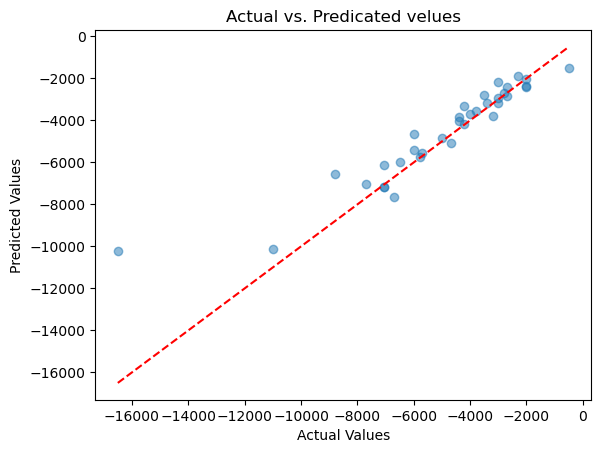

In [18]:
plt.scatter(y_test, y_pred, alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated velues')
plt.show()

In [19]:
import pickle 

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [20]:
with open('model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

In [21]:
y_pred = xgb_model.predict(X_test)

print(r2_score(y_test, y_pred))

0.8200244683979485
